In [1]:
import matplotlib.pyplot as plt
from lppls import lppls, data_loader
import numpy as np
import pandas as pd
from datetime import datetime as dt
from pathlib import Path
df = pd.read_csv("\yourdata.csv")
df.head()

,date,Crix
0,2017-09-06,1058.48
1,2017-09-07,1057.11
2,2017-09-08,986.22
3,2017-09-09,977.70
4,2017-09-10,956.77


In [2]:
df.isnull().count()

date    2010
Crix    2010
dtype: int64

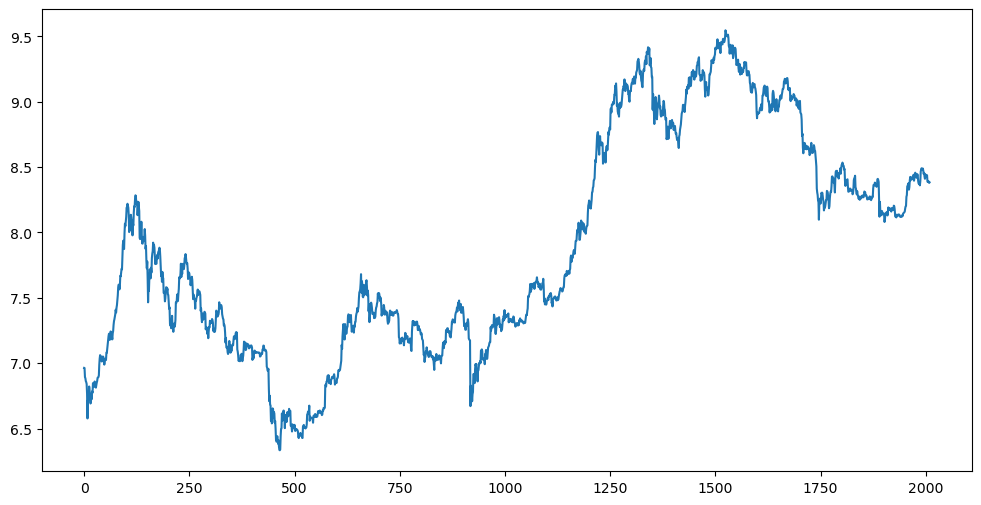

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(np.log(df['Crix'].values))

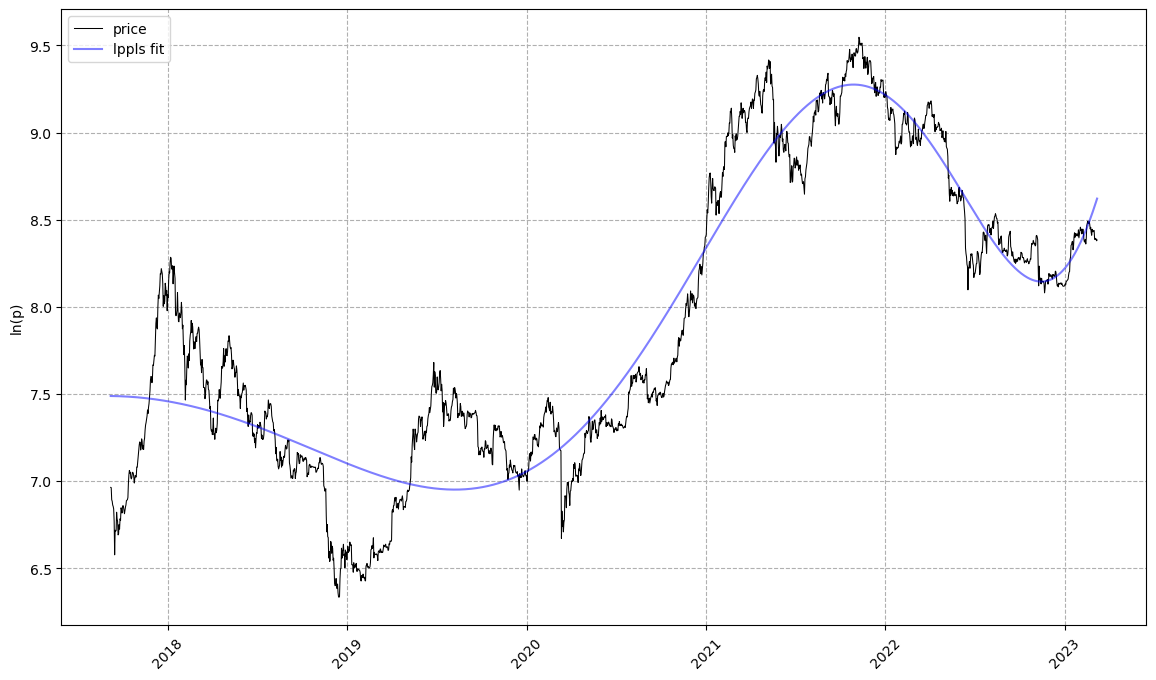

In [4]:
%matplotlib inline

time = [pd.Timestamp.toordinal(dt.strptime(t1, '%Y-%m-%d')) for t1 in df['date']]

price = np.log((df['Crix'].values))

observations = np.array([time, price])

# set the max number for searches to perform before giving-up
# the literature suggests 25
MAX_SEARCHES = 25

lppls_model = lppls.LPPLS(observations=observations)

tc, m, w, a, b, c, c1, c2, O, D = lppls_model.fit(MAX_SEARCHES)

lppls_model.plot_fit()

100%|██████████████████████████████████████████████████████████████████████████████| 1976/1976 [01:35<00:00, 20.65it/s]


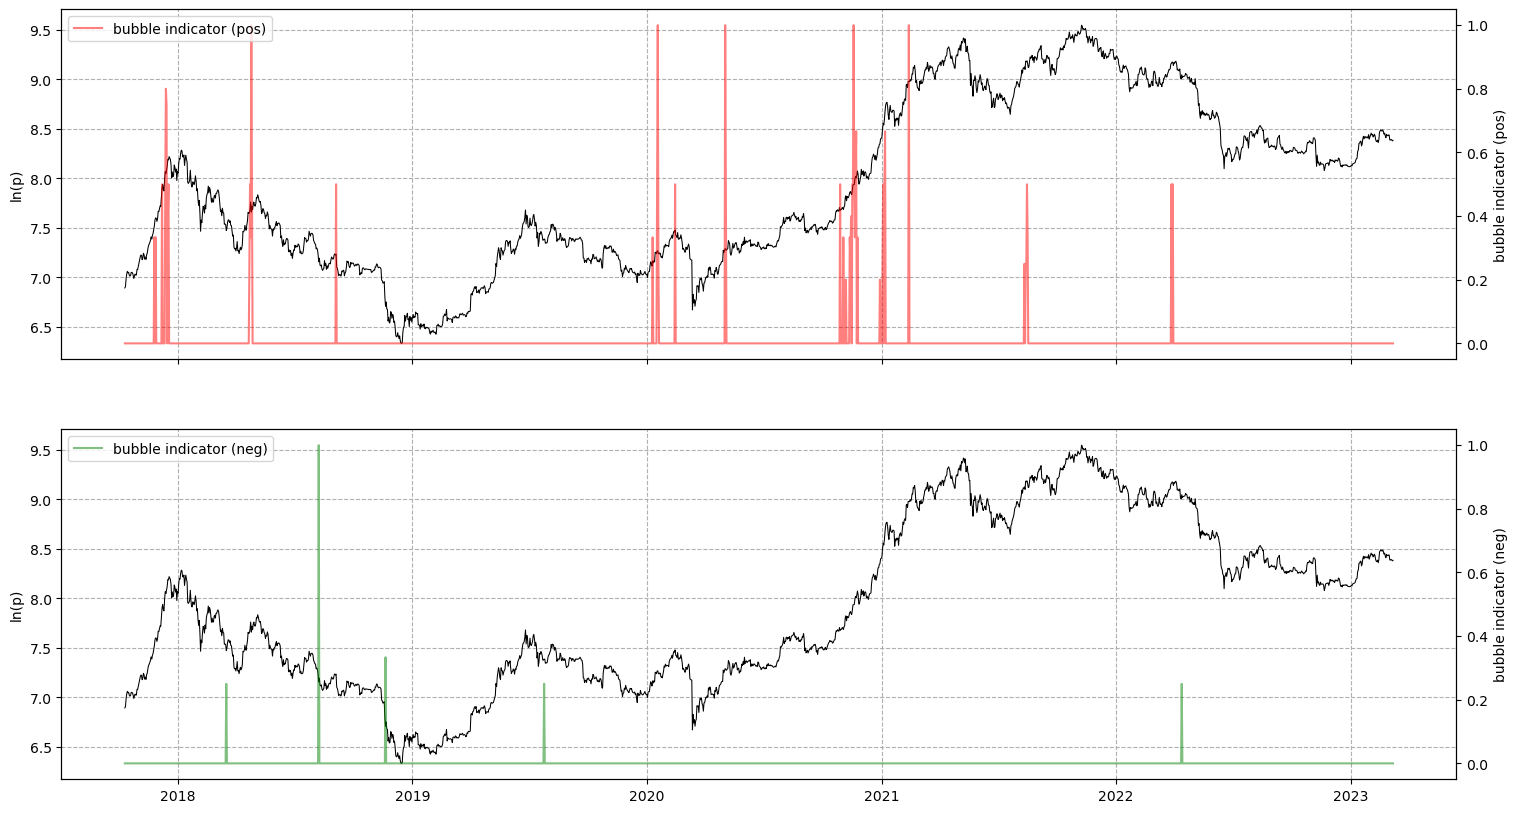

In [5]:
res = lppls_model.mp_compute_nested_fits(
    workers=10,
    window_size=35, 
    smallest_window_size=10, 
    outer_increment=1, 
    inner_increment=5, 
    max_searches=25,
)


lppls_model.plot_confidence_indicators(res)

In [6]:
res_df = lppls_model.compute_indicators(res)
res_df

,time,price,pos_conf,neg_conf,_fits
0,736612.0,6.893849,0.0,0.0,"[{'tc': 901113.4564840379, 'm': 0.747045064267..."
1,736613.0,6.906765,0.0,0.0,"[{'tc': 736572.7967854813, 'm': -0.60479991002..."
2,736614.0,6.986770,0.0,0.0,"[{'tc': 836764.9692392412, 'm': 0.737705894593..."
3,736615.0,7.036113,0.0,0.0,"[{'tc': 736581.9881799074, 'm': 0.019485075341..."
4,736616.0,7.061900,0.0,0.0,"[{'tc': 815748.8682348996, 'm': 0.625863304541..."
...,...,...,...,...,...
1971,738583.0,8.386020,0.0,0.0,"[{'tc': 738543.8356540896, 'm': 0.386649161755..."
1972,738584.0,8.393012,0.0,0.0,"[{'tc': 738525.810291916, 'm': 0.1757310020280..."
1973,738585.0,8.388830,0.0,0.0,"[{'tc': 738531.4256795469, 'm': 0.229686470895..."
1974,738586.0,8.379062,0.0,0.0,"[{'tc': 738585.1026307396, 'm': 0.377226939453..."


In [7]:
filepath = Path('\Data.csv') 

res_df.to_csv(filepath)